# Теория
Логистическая регрессия — это статистический метод, используемый для анализа набора данных, в котором одна или несколько независимых переменных определяют исход. Этот метод предсказывает вероятность принадлежности наблюдаемого объекта к определенному классу и преимущественно применяется для решения задач бинарной классификации. В отличие от линейной регрессии, предсказывающей значение непрерывной переменной, логистическая регрессия оценивает логарифм шанса (logit или лог-шансы) того, что наблюдаемый объект принадлежит к определенному классу.

Основой логистической регрессии является сигмоидальная функция, которая принимает любые значения на входе и выводит результаты в интервале от 0 до 1, что делает ее идеальной для оценки вероятностей. В контексте классификации результаты можно интерпретировать как вероятности принадлежности к классу "1" (например, наличие заболевания, подтверждение спама и т.д.), при этом порог классификации часто устанавливается на уровне 0.5.

Для оценки производительности модели логистической регрессии используются различные метрики. Основными метриками являются:

- Точность (Accuracy): суммирует количество правильных предсказаний из всех прогнозов.
- Полнота (Recall): показывает, какую долю объектов положительного класса из всех объектов положительного класса в выборке смогла определить модель.
- Точность (Precision): показывает, какая доля объектов, определенных моделью как положительные, действительно является положительной.
- F1-мера: гармоническое среднее точности и полноты, позволяющее учесть баланс между ними.

Учитывая, что в реальных задачах данные зачастую несбалансированы, важно выбирать такие метрики, которые корректно отражают качество модели, не давая предпочтения классам с большим количеством наблюдений.

# Задача:  
Имеется датасет, полученный в ходе исследования факторов, способных повлиять на депрессию людей, живущих в сельской местности. Задача модели ML --- научиться определять склонность к депрессии (0 --- не страдает, 1 --- страдает). Это типичная задача бинарной классификации.
1. Survey_id - уникальный идентификатор опроса, проведенного среди участников.
2. Ville_id - уникальный идентификатор города, где проводился опрос.
3. sex - пол участника опроса,  1 - мужской, а 0 - женский.
4. Age - возраст участников опроса.
5. Married - семейное положение участника, где 1  женат/замужем, а 0 - нет.
6. Number_children - количество детей у участника.
7. education_level - уровень образования участника, закодированный.
8. total_members - общее количество членов в семье участника.
9. gained_asset - активы, приобретенные участником.
10. durable_asset - долгосрочные активы участника.
11. save_asset - сбережения участника.
12. living_expgenderenses - расходы на проживание.
13. other_expenses - другие расходы участника.
14. incoming_salary - доход от зарплаты.
15. incoming_own_farm - доход от собственного хозяйства.
16. incoming_business - доход от ведения бизнеса.
17. incoming_no_business - другие источники дохода, не связанные с бизнесом.
18. incoming_agricultural - сельскохозяйственный доход.
19. farm_expenses - расходы на ведение хозяйства.
20. labor_primary - отметка основного занятия трудом (1 - да, 0 - нет).
21. lasting_investment - долгосрочные инвестиции участника.
22. no_lasting_investmen - отсутствие долгосрочных инвестиций.
23. depressed - указание на наличие депрессии у участника, где 1 может означать наличие депрессии, а 0 - её отсутствие.

### Загрузка библиотек

In [11]:
# подключает модуль `warnings`, который показыват потенциальные проблемы в коде, которые не являются критическими,
# и позволяют разработчикам учитывать различные сценарии.
import warnings
#  настраивает обработку предупреждений так, чтобы все предупреждения игнорировались и не выводились в консоль.
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

Для начала посмотрим наши данные

In [2]:
df = pd.read_csv('b_depressed.csv')
df.head()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


In [7]:
df['depressed'].value_counts()/ len(df)

depressed
0    0.83345
1    0.16655
Name: count, dtype: float64

Обязательно посмотрим информацию о признаках датасета

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey_id              1429 non-null   int64  
 1   Ville_id               1429 non-null   int64  
 2   sex                    1429 non-null   int64  
 3   Age                    1429 non-null   int64  
 4   Married                1429 non-null   int64  
 5   Number_children        1429 non-null   int64  
 6   education_level        1429 non-null   int64  
 7   total_members          1429 non-null   int64  
 8   gained_asset           1429 non-null   int64  
 9   durable_asset          1429 non-null   int64  
 10  save_asset             1429 non-null   int64  
 11  living_expenses        1429 non-null   int64  
 12  other_expenses         1429 non-null   int64  
 13  incoming_salary        1429 non-null   int64  
 14  incoming_own_farm      1429 non-null   int64  
 15  inco

 DataFrame содержит 1429 записей (от индекса 0 до 1428).

1. Всего 23 столбца в DataFrame, и все они содержат тип данных `int64`, кроме столбца `no_lasting_investmen`, который имеет тип данных `float64`. Столбец `no_lasting_investmen` имеет 20 ненулевых значений меньше, чем остальные столбцы (1409 ненулевых значений против 1429), что указывает на наличие пропущенных значений.

2. Названия столбцов включают `Survey_id`, `Ville_id`, `sex`, `Age`, `Married`, `Number_children`, `education_level`, и т.д., что намекает на то, что данные, вероятно, относятся к результатам какого-то социологического исследования или опроса.





Проверим наличие в наших данных пропущенных значений

In [8]:
df.isna().sum()

Survey_id                 0
Ville_id                  0
sex                       0
Age                       0
Married                   0
Number_children           0
education_level           0
total_members             0
gained_asset              0
durable_asset             0
save_asset                0
living_expenses           0
other_expenses            0
incoming_salary           0
incoming_own_farm         0
incoming_business         0
incoming_no_business      0
incoming_agricultural     0
farm_expenses             0
labor_primary             0
lasting_investment        0
no_lasting_investmen     20
depressed                 0
dtype: int64

Проверим распределение целевой переменной

In [14]:
df['depressed'].value_counts()

depressed
0    1191
1     238
Name: count, dtype: int64

In [15]:
# можно воспользоваться параметром `normalize=True` функции `value_counts()`
# этот параметр приводит значения к доле от общего числа (в виде пропорций), которые можно затем умножить на 100 для получения процентов.
percentages = df['depressed'].value_counts(normalize=True) * 100
percentages = percentages.round(2)  # округление до 2 знаков после запятой
percentages

depressed
0    83.34
1    16.66
Name: proportion, dtype: float64

Наблюдаем ситуацию сильного дисбаланса классов в данных. С долей 83.3% участников, не страдающих депрессией (класс "0"), и 16.7% участников, страдающих депрессией (класс "1"), ясно, что данный набор данных имеет низкое представительство одного из классов по сравнению с другим.

Дальнейшие шаги:
- убрать пропуски (в столбце no_lasting_investmen);
- убрать лишние признаке Survey_id (номер опроса) и Ville_id, так как данные признаки не дают нам важной информации;


In [16]:
# удалим пропуски
df.dropna(inplace=True)

# дропнем ненужные столбцы
df = df.drop(['Survey_id', 'Ville_id'], axis=1)


Обязательно надо посмотртеть на сводную статистику

In [17]:
df.describe()

,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
count,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1.409000e+03,1.409000e+03,1.409000e+03,1.409000e+03,...,1409.000000,1409.000000,1409.000000,1409.000000,1.409000e+03,1.409000e+03,1409.000000,1.409000e+03,1.409000e+03,1409.000000
mean,0.918382,34.733854,0.774308,2.904897,8.697658,4.996451,3.360588e+07,2.707096e+07,2.744453e+07,3.248661e+07,...,0.176011,0.254081,0.109297,0.264017,3.457400e+07,3.555012e+07,0.209368,3.300612e+07,3.360385e+07,0.166785
std,0.273879,13.800712,0.418186,1.872585,2.913673,1.772778,2.007839e+07,1.804276e+07,1.778911e+07,2.101274e+07,...,0.380965,0.435498,0.312123,0.440965,2.091860e+07,2.126744e+07,0.407002,2.114974e+07,2.160228e+07,0.372916
min,0.000000,17.000000,0.000000,0.000000,1.000000,1.000000,3.251120e+05,1.625560e+05,1.729660e+05,2.629190e+05,...,0.000000,0.000000,0.000000,0.000000,3.251120e+05,2.715050e+05,0.000000,7.429200e+04,1.263120e+05,0.000000
25%,1.000000,25.000000,1.000000,2.000000,8.000000,4.000000,2.312976e+07,1.929852e+07,2.339998e+07,2.103352e+07,...,0.000000,0.000000,0.000000,0.000000,2.295536e+07,2.239928e+07,0.000000,2.010056e+07,2.064203e+07,0.000000
50%,1.000000,31.000000,1.000000,3.000000,9.000000,5.000000,2.891220e+07,2.286194e+07,2.339998e+07,2.669228e+07,...,0.000000,0.000000,0.000000,0.000000,3.002882e+07,3.136343e+07,0.000000,2.841172e+07,2.829271e+07,0.000000
75%,1.000000,42.000000,1.000000,4.000000,10.000000,6.000000,3.717283e+07,2.634528e+07,2.339998e+07,3.870381e+07,...,0.000000,1.000000,0.000000,1.000000,4.003842e+07,4.399778e+07,0.000000,3.978445e+07,4.151762e+07,0.000000
max,1.000000,91.000000,1.000000,11.000000,19.000000,12.000000,9.912755e+07,9.961560e+07,9.992676e+07,9.929528e+07,...,1.000000,1.000000,1.000000,1.000000,9.978910e+07,9.965119e+07,1.000000,9.944667e+07,9.965119e+07,1.000000


Анализ важности признаков:
- Используйте различные методы оценки важности признаков (например, через коэффициенты логистической регрессии, матрицу корреляции) для определения тех факторов, которые наиболее сильно связаны с депрессией.
- Обсудите полученные результаты.



In [18]:
df.corr()

,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
sex,1.000000,-0.160021,0.279331,0.214736,-0.075446,0.180790,0.020975,0.030935,0.005885,-0.004096,...,-0.039199,0.066806,0.087812,0.102102,0.017782,0.071194,-0.031365,0.041475,0.048166,-0.005700
Age,-0.160021,1.000000,-0.394248,-0.132483,-0.365252,-0.064601,0.003119,0.044523,-0.023356,-0.030661,...,-0.045388,0.127776,-0.027702,-0.087178,-0.008678,-0.009002,-0.055950,0.043428,-0.023430,0.100126
Married,0.279331,-0.394248,1.000000,0.222891,0.213837,0.239382,-0.014569,-0.044124,0.005944,0.022196,...,0.013248,0.003111,-0.033972,0.042202,-0.044373,0.036471,0.006589,0.003515,0.050146,-0.063588
Number_children,0.214736,-0.132483,0.222891,1.000000,0.169286,0.778443,0.020091,-0.007562,0.027397,-0.001012,...,-0.015346,0.057520,0.028733,0.059673,0.016141,0.050421,-0.013927,0.044185,0.014344,0.003406
education_level,-0.075446,-0.365252,0.213837,0.169286,1.000000,0.122167,0.018124,-0.011104,0.045395,0.010008,...,0.008306,-0.035689,0.012933,0.035638,-0.055886,0.010055,0.040241,0.003085,0.013849,-0.097361
total_members,0.180790,-0.064601,0.239382,0.778443,0.122167,1.000000,0.020184,-0.032415,0.035591,-0.005888,...,-0.042191,0.087643,0.003269,0.062979,0.023211,0.070977,-0.040312,0.046258,0.048028,0.033125
gained_asset,0.020975,0.003119,-0.014569,0.020091,0.018124,0.020184,1.000000,-0.006444,-0.002110,0.076366,...,0.030749,0.124183,0.051441,0.076545,0.029121,0.059163,0.025406,0.032492,0.030779,-0.005111
durable_asset,0.030935,0.044523,-0.044124,-0.007562,-0.011104,-0.032415,-0.006444,1.000000,-0.037135,0.025961,...,0.075406,0.069863,0.017577,0.023928,0.025960,0.029388,0.090080,0.245233,0.022460,0.038323
save_asset,0.005885,-0.023356,0.005944,0.027397,0.045395,0.035591,-0.002110,-0.037135,1.000000,0.025612,...,0.043525,0.039047,0.067391,0.053529,0.022779,0.040158,0.066548,0.038979,0.028610,0.011379
living_expenses,-0.004096,-0.030661,0.022196,-0.001012,0.010008,-0.005888,0.076366,0.025961,0.025612,1.000000,...,0.086154,0.076619,0.032048,0.023522,0.116382,0.003500,0.079661,0.040274,0.047035,-0.024149


<Axes: >

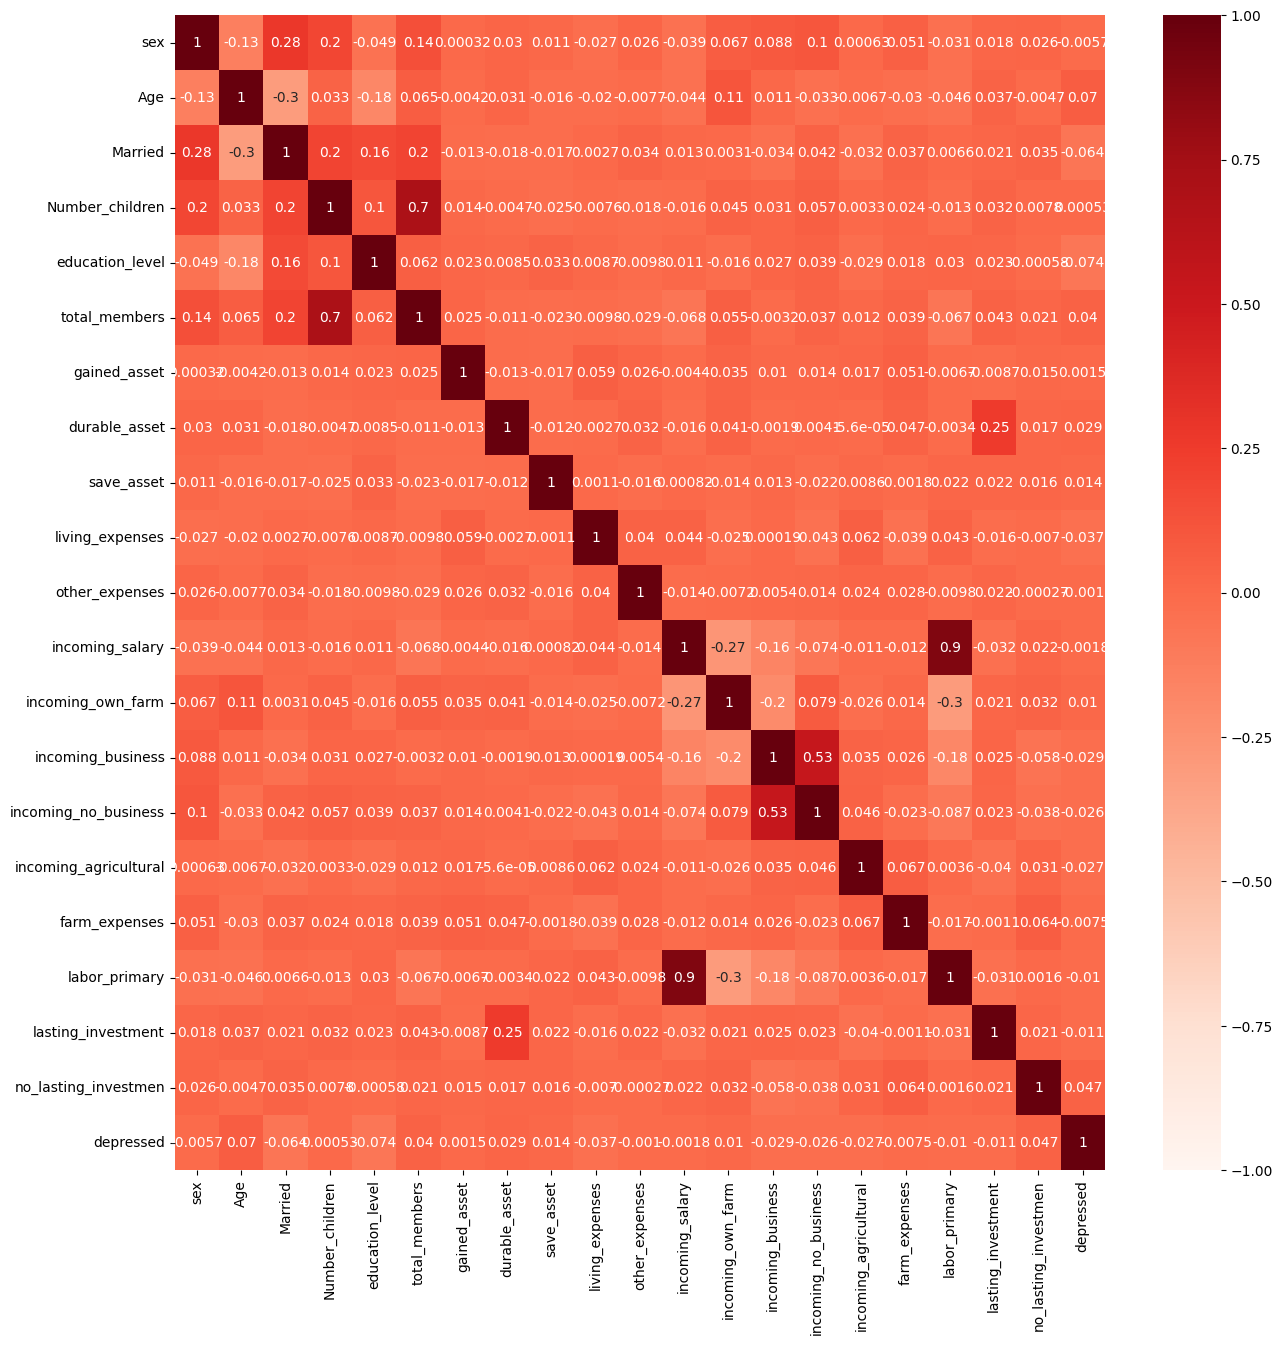

In [19]:
plt.figure(figsize=(15,15))
corr_matrix = df.corr(method='kendall')
sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1, center=0, cmap=plt.cm.Reds)

Посмотрим взаимодействие признаков

In [21]:
correlation_matrix = df.corr()  # вычисляем матрицу корреляции
correlation_matrix

,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
sex,1.000000,-0.160021,0.279331,0.214736,-0.075446,0.180790,0.020975,0.030935,0.005885,-0.004096,...,-0.039199,0.066806,0.087812,0.102102,0.017782,0.071194,-0.031365,0.041475,0.048166,-0.005700
Age,-0.160021,1.000000,-0.394248,-0.132483,-0.365252,-0.064601,0.003119,0.044523,-0.023356,-0.030661,...,-0.045388,0.127776,-0.027702,-0.087178,-0.008678,-0.009002,-0.055950,0.043428,-0.023430,0.100126
Married,0.279331,-0.394248,1.000000,0.222891,0.213837,0.239382,-0.014569,-0.044124,0.005944,0.022196,...,0.013248,0.003111,-0.033972,0.042202,-0.044373,0.036471,0.006589,0.003515,0.050146,-0.063588
Number_children,0.214736,-0.132483,0.222891,1.000000,0.169286,0.778443,0.020091,-0.007562,0.027397,-0.001012,...,-0.015346,0.057520,0.028733,0.059673,0.016141,0.050421,-0.013927,0.044185,0.014344,0.003406
education_level,-0.075446,-0.365252,0.213837,0.169286,1.000000,0.122167,0.018124,-0.011104,0.045395,0.010008,...,0.008306,-0.035689,0.012933,0.035638,-0.055886,0.010055,0.040241,0.003085,0.013849,-0.097361
total_members,0.180790,-0.064601,0.239382,0.778443,0.122167,1.000000,0.020184,-0.032415,0.035591,-0.005888,...,-0.042191,0.087643,0.003269,0.062979,0.023211,0.070977,-0.040312,0.046258,0.048028,0.033125
gained_asset,0.020975,0.003119,-0.014569,0.020091,0.018124,0.020184,1.000000,-0.006444,-0.002110,0.076366,...,0.030749,0.124183,0.051441,0.076545,0.029121,0.059163,0.025406,0.032492,0.030779,-0.005111
durable_asset,0.030935,0.044523,-0.044124,-0.007562,-0.011104,-0.032415,-0.006444,1.000000,-0.037135,0.025961,...,0.075406,0.069863,0.017577,0.023928,0.025960,0.029388,0.090080,0.245233,0.022460,0.038323
save_asset,0.005885,-0.023356,0.005944,0.027397,0.045395,0.035591,-0.002110,-0.037135,1.000000,0.025612,...,0.043525,0.039047,0.067391,0.053529,0.022779,0.040158,0.066548,0.038979,0.028610,0.011379
living_expenses,-0.004096,-0.030661,0.022196,-0.001012,0.010008,-0.005888,0.076366,0.025961,0.025612,1.000000,...,0.086154,0.076619,0.032048,0.023522,0.116382,0.003500,0.079661,0.040274,0.047035,-0.024149


Но визуализация может дать больше информации. Тепловая матрица корреляций визуализирует численные показатели корреляции между переменными с помощью цветов. Цветовая шкала часто используется для наглядного представления степени и направления связи.   
Подход к интерпретации:
1. читайте корреляцию между переменными, ориентируясь на цвета и значения.
2. определите переменные с самой высокой или низкой корреляцией.
3. ищите пары переменных с близкими к 0 значениями, если важно определить независимые факторы.
4. помните, что корреляция — это линейная связь, но она не указывает на причинно-следственную зависимость.

In [22]:
correlation_matrix.style.background_gradient(cmap='coolwarm').format(precision=2)

,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,other_expenses,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
sex,1.00,-0.16,0.28,0.21,-0.08,0.18,0.02,0.03,0.01,-0.00,0.05,-0.04,0.07,0.09,0.10,0.02,0.07,-0.03,0.04,0.05,-0.01
Age,-0.16,1.00,-0.39,-0.13,-0.37,-0.06,0.00,0.04,-0.02,-0.03,0.02,-0.05,0.13,-0.03,-0.09,-0.01,-0.01,-0.06,0.04,-0.02,0.10
Married,0.28,-0.39,1.00,0.22,0.21,0.24,-0.01,-0.04,0.01,0.02,0.03,0.01,0.00,-0.03,0.04,-0.04,0.04,0.01,0.00,0.05,-0.06
Number_children,0.21,-0.13,0.22,1.00,0.17,0.78,0.02,-0.01,0.03,-0.00,0.01,-0.02,0.06,0.03,0.06,0.02,0.05,-0.01,0.04,0.01,0.00
education_level,-0.08,-0.37,0.21,0.17,1.00,0.12,0.02,-0.01,0.05,0.01,-0.04,0.01,-0.04,0.01,0.04,-0.06,0.01,0.04,0.00,0.01,-0.10
total_members,0.18,-0.06,0.24,0.78,0.12,1.00,0.02,-0.03,0.04,-0.01,0.01,-0.04,0.09,0.00,0.06,0.02,0.07,-0.04,0.05,0.05,0.03
gained_asset,0.02,0.00,-0.01,0.02,0.02,0.02,1.00,-0.01,-0.00,0.08,0.03,0.03,0.12,0.05,0.08,0.03,0.06,0.03,0.03,0.03,-0.01
durable_asset,0.03,0.04,-0.04,-0.01,-0.01,-0.03,-0.01,1.00,-0.04,0.03,0.08,0.08,0.07,0.02,0.02,0.03,0.03,0.09,0.25,0.02,0.04
save_asset,0.01,-0.02,0.01,0.03,0.05,0.04,-0.00,-0.04,1.00,0.03,0.03,0.04,0.04,0.07,0.05,0.02,0.04,0.07,0.04,0.03,0.01
living_expenses,-0.00,-0.03,0.02,-0.00,0.01,-0.01,0.08,0.03,0.03,1.00,0.06,0.09,0.08,0.03,0.02,0.12,0.00,0.08,0.04,0.05,-0.02


- Сильная положительная корреляция (0.53) между 'incoming_no_business' и 'no_lasting_investmen'.
- Сильная отрицательная корреляция (-0.27 и -0.20) между 'incoming_no_business' и 'living_expenses' и между 'incoming_no_business' и 'farm_expenses' соответственно.


Посмотрим также корреляцию между целевой переменной и остальными признаками:  
Слабые зависимости:
1. Общие слабые корреляции (все близки к 0):
   - Корреляция с большинством переменных, таких как пол (sex), возраст (Age), семейное положение (Married), количество детей (Number_children), уровень образования (education_level), доходы и расходы (например, incoming_salary, other_expenses) и другие, практически отсутствуют (значения от -0.10 до 0.10).

2. Заметные тенденции:
   - "Incoming_salary" (доход от работы) имеет коэффициент корреляции 0.08 — это самая значимая положительная связь, хотя она остаётся очень слабой.
   - "Labor_primary" (основной вид труда) также показывает слабую связь (-0.02).


 Стандартизация признаков (приведение данных к одной шкале) — это важный этап при работе с машинными обучением, особенно при использовании линейных моделей.  


In [37]:
# алгоритм стандартизации библиотеки sklearn
scaler = StandardScaler()
X = df.drop('depressed', axis=1)
X_scaled = scaler.fit_transform(X)
y = df['depressed']
X_scaled

array([[ 0.2981136 , -0.48810848,  0.5398849 , ..., -0.51459838,
        -0.21730912, -0.24594762],
       [ 0.2981136 , -0.85053726,  0.5398849 , ..., -0.51459838,
        -0.21730912, -0.24594762],
       [ 0.2981136 , -0.92302302,  0.5398849 , ..., -0.51459838,
        -0.21730912, -0.24594762],
       ...,
       [ 0.2981136 ,  2.26635024, -1.85224664, ..., -0.51459838,
         0.63562149, -1.0719976 ],
       [ 0.2981136 ,  1.1790639 ,  0.5398849 , ..., -0.51459838,
        -0.21730912, -0.24594762],
       [ 0.2981136 , -0.1256797 , -1.85224664, ..., -0.51459838,
         1.73283572, -0.95354166]])

Обучим модель на всех данных без разделения, чтобы посмотреть, какие коэффициенты подобрала модель

In [38]:
# создание и обучение модели логистической регрессии, параметр class_weight='balanced' помогает сбалансировать классы.
lg = LogisticRegression(class_weight='balanced')
lg.fit(X_scaled, y)

# после обучения модели можно получить коэффициенты\
lg.coef_

array([[-0.01773202,  0.15353774, -0.09147685, -0.03173681, -0.17681166,
         0.20232988,  0.01417935,  0.12495993,  0.07856363, -0.05147489,
         0.0280834 ,  0.08017937, -0.07157315, -0.12255547,  0.00712838,
        -0.07135595, -0.00760636, -0.12553524, -0.03947766,  0.16622938]])

Посмотртим на коэффициенты для каждого признака

In [39]:
feature_names = X.columns
coefficients = lg.coef_[0]  # lg.coef_ возвращает массив в массиве, если модель обучена на двухмерном X

# связывание имен признаков с их коэффициентами
feature_importances = zip(feature_names, coefficients)

# преобразование в список для более удобного отображения
feature_importance_list = list(feature_importances)

# отображение признаков и их коэффициентов
for feature, coef in feature_importance_list:
    print(f"{feature}: {coef}")

sex: -0.017732023304474424
Age: 0.15353774343471926
Married: -0.09147685242292104
Number_children: -0.03173681495712882
education_level: -0.17681165956608474
total_members: 0.20232987677720637
gained_asset: 0.014179354848039585
durable_asset: 0.12495993086977714
save_asset: 0.07856362974344203
living_expenses: -0.05147488918511295
other_expenses: 0.028083401188299
incoming_salary: 0.08017936852353065
incoming_own_farm: -0.07157314835211114
incoming_business: -0.12255547137538003
incoming_no_business: 0.007128382635441426
incoming_agricultural: -0.0713559530827436
farm_expenses: -0.00760635709726243
labor_primary: -0.1255352372222173
lasting_investment: -0.0394776613839593
no_lasting_investmen: 0.1662293763402072


Анализируя коэффициенты логистической регрессии в контексте предсказания депрессии, мы можем сделать следующие выводы относительно влияния различных факторов на вероятность её наличия:

- Положительные коэффициенты (например, Age (0.14218200354221544) и total_members (0.18322053375135394)) говорят о том, что с увеличением возраста и числа членов семьи вероятность наличия депрессии увеличивается. Это может отражать дополнительные социальные, экономические и эмоциональные нагрузки, связанные с возрастом и большим количеством членов семьи.
  
- Отрицательные коэффициенты, включая education_level (-0.1836267504751811), указывают на то, что более высокий уровень образования может действовать как защитный фактор против депрессии. Это может быть связано с лучшими возможностями для трудоустройства, более высоким доходом или более высокой самооценкой и чувством контроля над своей жизнью у более образованных людей.

- labor_primary (-0.118313744698778) показывает, что основные трудозатраты связаны с меньшей вероятностью депрессии, что может отражать позитивное влияние занятости и регулярной деятельности на психологическое благополучие человека.

- no_lasting_investmen (0.15906579575968968) предполагает, что отсутствие долгосрочных инвестиций коррелирует с более высокой вероятностью депрессии, что может указывать на финансовую нестабильность или отсутствие перспектив и как следствие - на увеличение стрессовых факторов.

-  total_members (0.18322053375135394): Показывает положительное взаимодействие с зависимой переменной, что означает, что увеличение числа членов семьи коррелирует с увеличением вероятность наличия депрессии.



Попробуем использовать 3 признака, у которые получили наибольшие коэффициенты

In [26]:
# импортируем accuracy
from sklearn.metrics import accuracy_score

In [27]:
X = df[['Age', 'education_level','total_members']]  # Выбираем признаки
y = df['depressed']  # Целевая переменная

X_train, X_test1, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

predictions = model.predict(X_test1)
accuracy2 = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy2)

Accuracy: 0.6347517730496454


Добавим Семейное положение (`Married`). Наличие или отсутствие партнера может влиять на уровень поддержки и стабильность, которую человек ощущает в своей жизни, что, в свою очередь, может влиять на психическое здоровье.

In [29]:
X = df[['Age', 'education_level', 'Married', 'total_members']]  # Выбираем признаки
y = df['depressed']  # Целевая переменная

X_train, X_test2, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
model1 = LogisticRegression(class_weight='balanced')
model1.fit(X_train, y_train)

predictions = model1.predict(X_test2)
accuracy3 = accuracy_score(y_test, predictions)
print(accuracy3)

0.6276595744680851


Наличие детей (`Number_children`): Дети могут быть как источником радости, так и стресса. Изучение их влияния на депрессию может быть полезным.

In [31]:
X = df[['Age', 'education_level', 'Married','total_members', 'Number_children']]  # Выбираем признаки
y = df['depressed']  # Целевая переменная

X_train, X_test3, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
model2 = LogisticRegression(class_weight='balanced')
model2.fit(X_train, y_train)

predictions = model2.predict(X_test3)
accuracy4 = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy4)

Accuracy: 0.6276595744680851


 Финансовое положение и доход (`incoming_salary`, `incoming_own_farm`, `incoming_business`): Финансовое давление и нестабильность могут быть значительными факторами стресса, повышающими вероятность депрессии. Включение финансовых показателей может улучшить предсказательную способность модели.

In [33]:
X = df[['Age', 'education_level', 'Married', 'Number_children', 'incoming_salary', 'incoming_own_farm', 'incoming_business','total_members']]  # Выбираем признаки
y = df['depressed']  # Целевая переменная

X_train, X_test4, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
model3 = LogisticRegression(class_weight='balanced')
model3.fit(X_train, y_train)

predictions = model3.predict(X_test4)
accuracy5 = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy5)

Accuracy: 0.6099290780141844


Мы не видим никаких изменений, в данном случае у нас была проблема с дисбалансом классов, accuracy не дает релевантной оценки данной модели

Воспользуемся другими метриками (например, точность, полнота, F1-мера), которые подходят для оценки ее качества.


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
models = {
    'Model 1': model,
    'Model 2': model1,
    'Model 3': model2,
    'Model 4': model3
}

test_datasets = {
    'Model 1': X_test1,
    'Model 2': X_test2,
    'Model 3': X_test3,
    'Model 4': X_test4
}

results = []

for model_name, model in models.items():
    X_test = test_datasets[model_name]
    y_pred = model.predict(X_test)
    scores = [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred, average='binary'),
        recall_score(y_test, y_pred, average='binary'),
        f1_score(y_test, y_pred, average='binary')
    ]
    results.append(scores)

# Создаем DataFrame для результатов
results_df = pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall', 'F1'], index=models.keys())

In [63]:
results_df

,Accuracy,Precision,Recall,F1
Model 1,0.634752,0.170213,0.390244,0.237037
Model 2,0.627660,0.166667,0.390244,0.233577
Model 3,0.627660,0.166667,0.390244,0.233577
Model 4,0.609929,0.151515,0.365854,0.214286


- Модель 1 имеет наивысшую точность (Accuracy) 63,47%, что делает её лучшей среди рассмотренных моделей, если судить только по этой метрике. F1-значение 0,237 также является наивысшим, что указывает на лучший баланс между Precision и Recall в этой модели по сравнению с другими.

- Модель 2 имеет чуть меньшую точность 62,76%, а её F1-значение очень близко к Модели 1 и составляет 0.233577.

- Модель 3 имеет точность 62,76% с самым высоким Recall 0.390244 среди всех моделей, что указывает на то, что она лучше других моделей находит истинные случаи депрессии, но это также приводит к меньшей точности (Precision).

- Модель 4 имеет такую же точность, как и Модель 3 (60,99%), но наименьшее значение точности (Precision) и F1-значение среди всех рассмотренных моделей, что делает её в целом наименее предпочтительной для оценки депрессии среди всех рассмотренных моделей.

В заключение, на основе этих данных Модель 1, кажется, представляет собой наилучшее сочетание точности (Accuracy), точности (Precision) и Recall для этой задачи, хотя идеальная модель должна быть выбрана в зависимости от специфических требований проекта, например, сколько важнее предотвратить ложноположительные результаты по сравнению с пропущенными случаями депрессии.

`Sklearn` позволяет использовать очень полезный инструмент, который может дать полное описания результатам классификации

Она предоставляет удобный текстовый отчет, в котором содержится информация о метриках качества модели для каждого класса, а также общие показатели для всей модели. Эти метрики помогают понять, насколько хорошо модель справляется с классификацией.

---

### Метрики `classification_report`
Отчет включает следующие показатели для каждого класса (label):

1. Precision (Точность)  
   - Показывает, какова доля истинно положительных предсказаний среди всех предсказаний модели для данного класса.  
   - Формула: `Precision = TP / (TP + FP)`
   - Где:
     - `TP` — число истинно положительных предсказаний.
     - `FP` — число ложных положительных.

2. Recall (Полнота)  
   - Показывает, насколько модель хорошо распознает примеры данного класса, т.е. доля корректно предсказанных объектов данного класса среди всех истинных объектов этого класса.  
   - Формула: `Recall = TP / (TP + FN)`
   - Где:
     - `TP` — число истинно положительных предсказаний.
     - `FN` — число ложных отрицательных.

3. F1-score  
   - Это гармоническое среднее между точностью (Precision) и полнотой (Recall).  
   - Формула: `F1 = 2 * (Precision * Recall) / (Precision + Recall)`
   - F1-score отражает баланс между Precision и Recall. Если одно из значений низкое, F1-score также будет низким.

4. Support (Частота)  
   - Количество истинных объектов для каждого класса в выборке (т.е., сколько раз каждый класс встречается в данных).  
   - Этот показатель отображает, сколько объектов было в каждом классе, но не зависит от производительности модели.

---

### Более общая информация:
В дополнение к метрикам для каждого класса `classification_report` может показывать сводные показатели:
- Accuracy (Точность классификации):  
  Общее количество правильных предсказаний (`TP + TN`) делится на общее количество объектов.

- Macro avg (Среднее значение метрик для классов):  
  Усреднение метрик (Precision, Recall, F1) по всем классам равномерно (без учета их частоты).  
  Полезно, когда классы сбалансированы.

- Weighted avg (Взвешенное среднее):  
  Усреднение метрик с учетом поддержки (Support) каждого класса.  
  Полезно, когда классы несбалансированы, чтобы учесть распределение данных.

- Support содержит информацию о количестве объектов, в данном случае в тесте у нас 282 объекта, из них 41 - 1 класс, 241 - 0 класс.

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test4)))

              precision    recall  f1-score   support

           0       0.86      0.65      0.74       241
           1       0.15      0.37      0.21        41

    accuracy                           0.61       282
   macro avg       0.50      0.51      0.48       282
weighted avg       0.76      0.61      0.66       282

